In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from glob import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
base_dir = '../input/skin-cancer-mnist-ham10000'


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

id_path_dict = {os.path.splitext(os.path.basename(x))[0]:x for x in glob(os.path.join(base_dir,'*','*.jpg'))}
df = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
df['path'] = df['image_id'].map(id_path_dict.get)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/HAM10000_i...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/HAM10000_i...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/HAM10000_i...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/skin-cancer-mnist-ham10000/HAM10000_i...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/skin-cancer-mnist-ham10000/HAM10000_i...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/HAM10000_i...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/HAM10000_i...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../input/skin-cancer-mnist-ham10000/HAM10000_i...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../input/skin-cancer-mnist-ham10000/HAM10000_i...


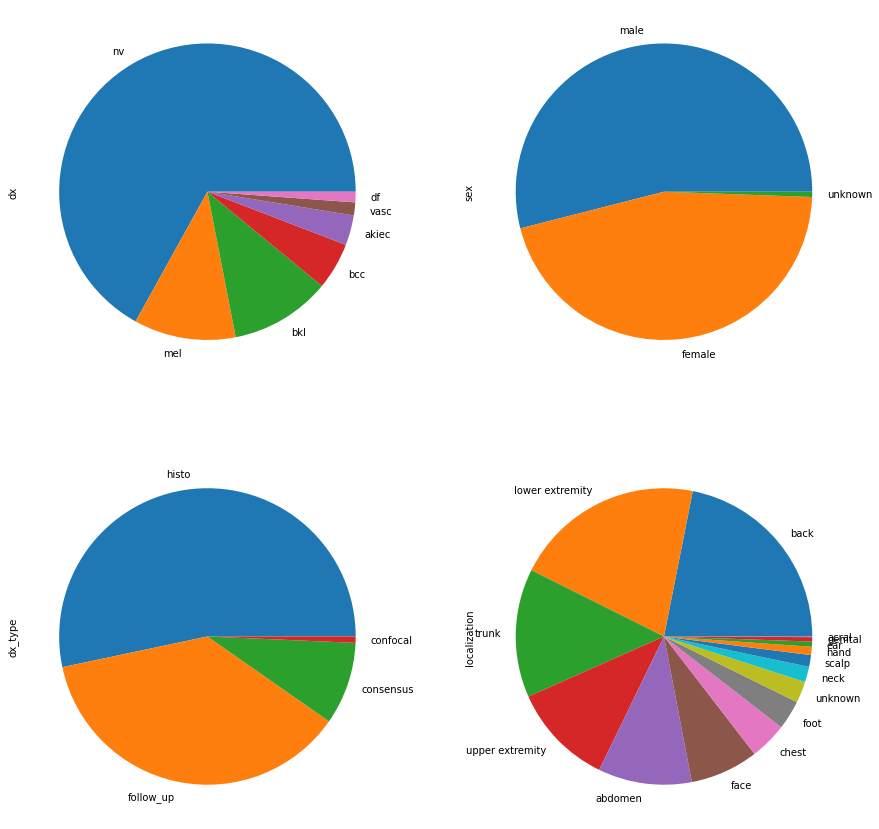

In [3]:
_, ax1 = plt.subplots(2,2,figsize=(15,15))
df['dx'].value_counts().plot(kind='pie', ax=ax1[0,0])
df['sex'].value_counts().plot(kind= 'pie', ax=ax1[0,1])
df['dx_type'].value_counts().plot(kind= 'pie',ax=ax1[1,0])
df['localization'].value_counts().plot(kind= 'pie', ax=ax1[1,1])

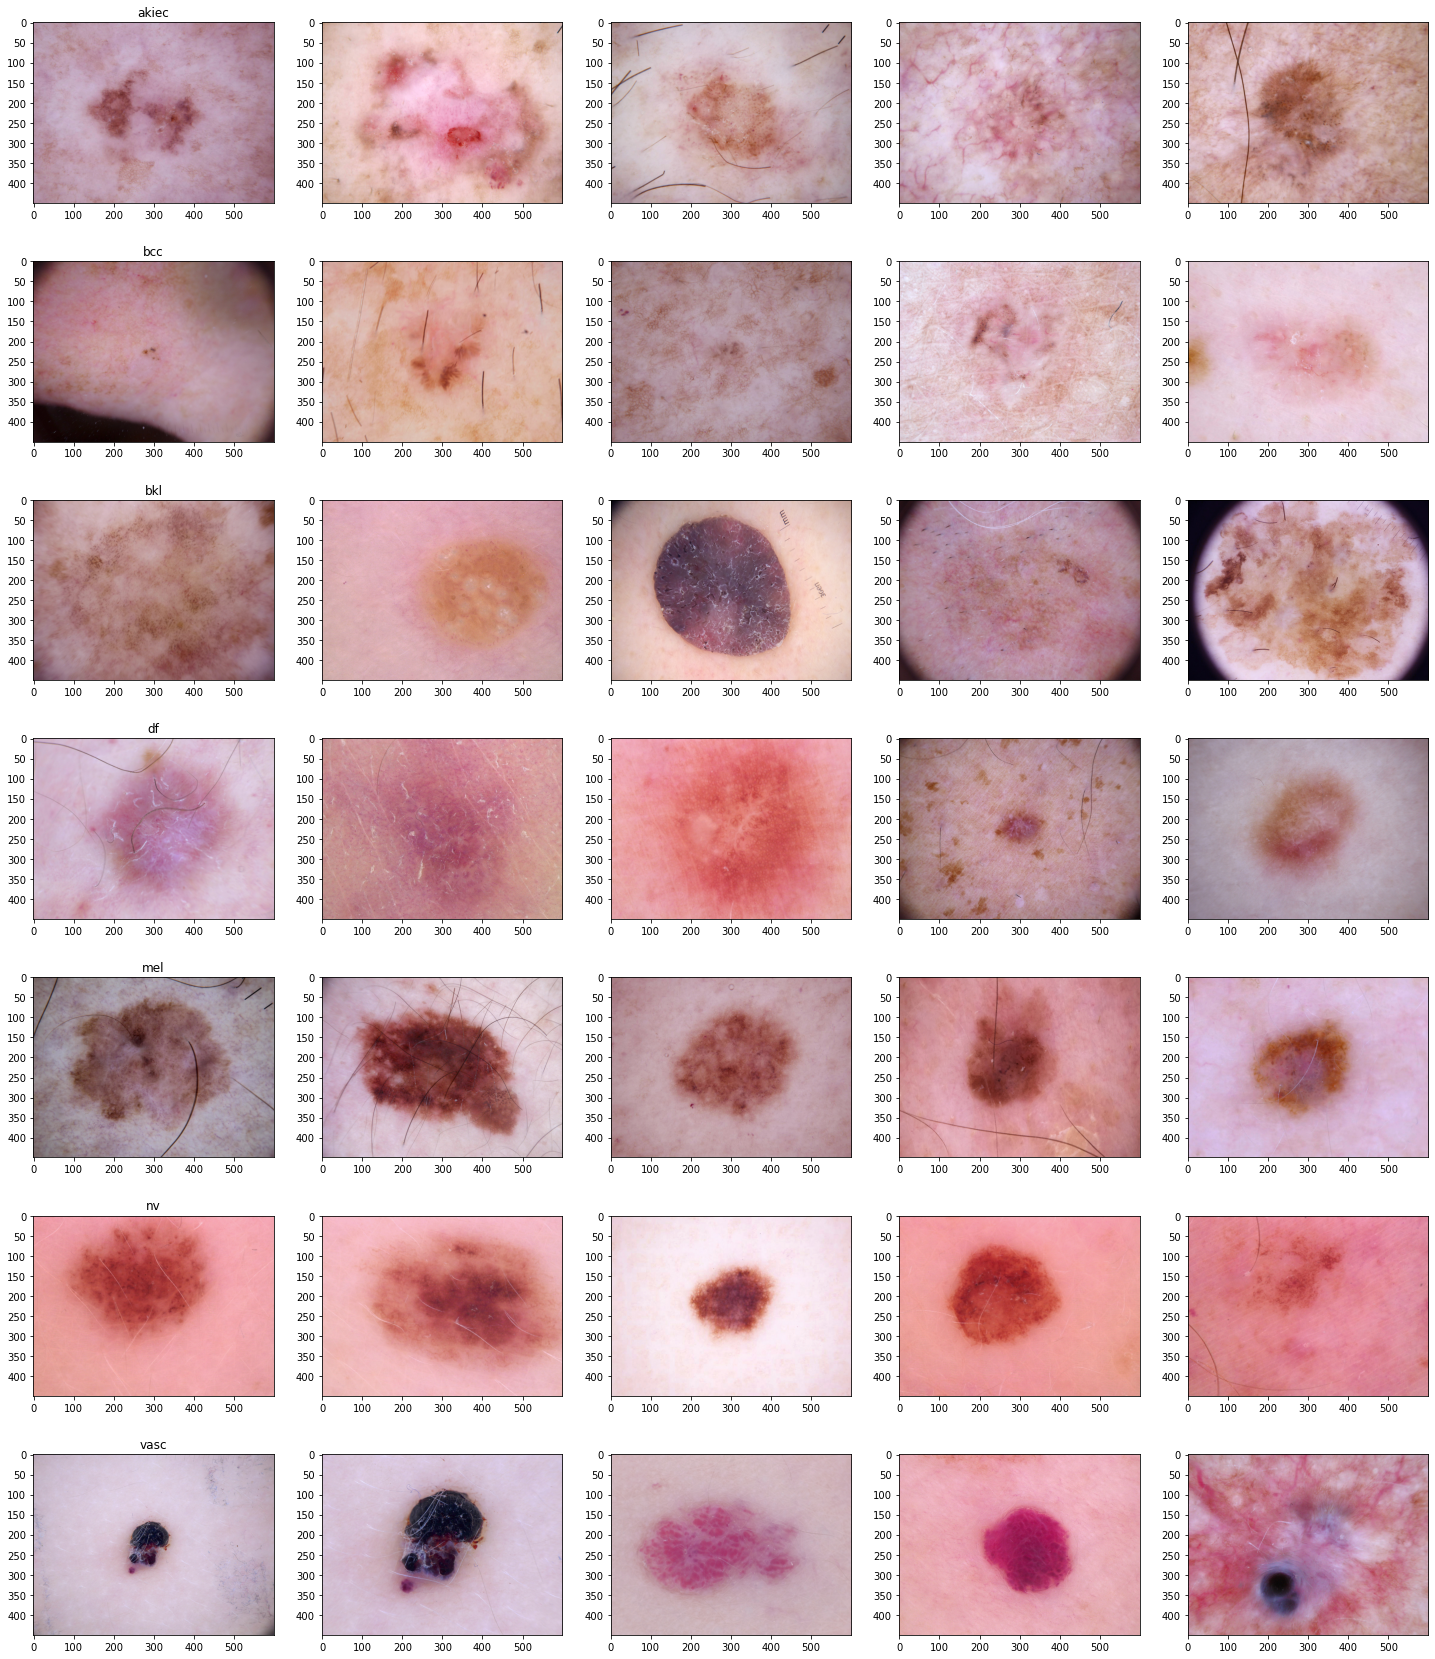

In [4]:
fig , axm = plt.subplots(7,5,figsize=(25,30))
for axn , (type_name,type_row) in zip(axm, df.groupby(['dx'])):
    axn[0].set_title(type_name)
    for axc,(_,crows) in zip(axn,type_row.sample(5).iterrows()):
        axc.imshow(imread(crows['path']))
        
    

In [5]:
train_df, test_df = train_test_split(df,test_size=0.2)

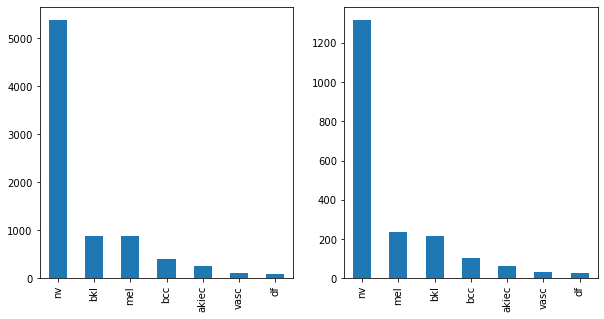

In [6]:
fig , ax1 = plt.subplots(1,2,figsize=(10,5))
train_df['dx'].value_counts().plot(kind = 'bar', ax = ax1[0])
test_df['dx'].value_counts().plot(kind = 'bar', ax = ax1[1])

In [7]:
import tensorflow as tf
IDG = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.4,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
train_DG = IDG.flow_from_dataframe(
    train_df,
    directory=None,
    x_col="path",
    y_col="dx",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
    validate_filenames=True
)
test_DG = IDG.flow_from_dataframe(
    test_df,
    directory=None,
    x_col="path",
    y_col="dx",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest",
    validate_filenames=True
)

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


In [8]:
import requests
model_URL = 'https://github.com/Fsunroo/RSNA-BoneAge/releases/download/v1.0/output.hdf5'
r = requests.get(model_URL)
with open('output.hdf5','wb') as f:
    f.write(r.content)
    f.close()

In [9]:
Source_model = tf.keras.models.load_model('output.hdf5')
Source_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 20,881,981
Trainable params: 20,827,453
Non-trainable params: 54,528
_________________________________________________________________


In [10]:
model = tf.keras.models.Sequential()
for layer in Source_model.layers[:-1]:
    model.add(layer)
model.add(tf.keras.layers.Dense(7,activation='softmax',name='dense_2'))
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 20,882,047
Trainable params: 20,827,519
Non-trainable params: 54,528
_________________________________________________________________


In [11]:
model.fit_generator(train_DG,
                    validation_data = test_DG,
                    epochs=20
                   )

Epoch 1/20
251/251 [==============================] - 387s 2s/step - loss: 0.0638 - accuracy: 0.6702 - val_loss: 0.0636 - val_accuracy: 0.6425
Epoch 2/20
251/251 [==============================] - 301s 1s/step - loss: 0.0556 - accuracy: 0.7122 - val_loss: 0.0882 - val_accuracy: 0.5512
Epoch 3/20
251/251 [==============================] - 300s 1s/step - loss: 0.0533 - accuracy: 0.7247 - val_loss: 0.0931 - val_accuracy: 0.5457
Epoch 4/20
251/251 [==============================] - 305s 1s/step - loss: 0.0506 - accuracy: 0.7409 - val_loss: 0.0561 - val_accuracy: 0.7269
Epoch 5/20
251/251 [==============================] - 309s 1s/step - loss: 0.0492 - accuracy: 0.7448 - val_loss: 0.0505 - val_accuracy: 0.7334
Epoch 6/20
251/251 [==============================] - 314s 1s/step - loss: 0.0470 - accuracy: 0.7592 - val_loss: 0.0552 - val_accuracy: 0.7119
Epoch 7/20
251/251 [==============================] - 318s 1s/step - loss: 0.0458 - accuracy: 0.7665 - val_loss: 0.0487 - val_accuracy: 0.7404

In [12]:
model.save('model_2.hdf5')
from IPython.display import FileLink
FileLink(r'model_2.hdf5')

/kaggle/working/model_2.hdf5